In [2]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

import moduli_miguel as mm
from utils import get_dati_tommaso, split_train_test
import estimators

#fa comparire i grafici direttamente sul notebook
%matplotlib inline 
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['figure.figsize'] = (12,8)

%load_ext autoreload
%autoreload 2

In [3]:
Xall = get_dati_tommaso(standardize=True)
X = Xall[1] # ANALYZE ONLY FIRST SUBJECT
Xtrain, Xtest = split_train_test(X, train_fraction=0.8, standardize=True)
Ctrain = Xtrain.T @ Xtrain / Xtrain.shape[0]
Ctest = Xtest.T @ Xtest / Xtest.shape[0] 
Xtrain.shape, Xtest.shape  

((144, 116), (36, 116))

## PCA cross-validated

In [ ]:
res = estimators.fit_PCA_CV(Xtrain, Xtest)
res

## PCA Minka

In [ ]:
res = estimators.fit_PCA_Minka(Xtrain, Xtest)
res

# PCA with fixed components

In [ ]:
metrics = ["train_likelihood","test_likelihood", "cross_val_likelihood",
           "train_completion_error","test_completion_error","cross_val_completion_error"]
resPCA = {m:[] for m in metrics}
resPCA["ncomponents"] = np.arange(2, Xtrain.shape[1], 1)

for ncomponents in resPCA["ncomponents"]:
    res  = estimators.fit_PCA(Xtrain, Xtest, ncomponents)
    for m in metrics:
        resPCA[m].append(res[m])

In [ ]:
plotPCA = True
if plotPCA:
    plt.title("PCA Likelihood")
    plt.xlabel("num PCA components")
    plt.ylabel("likelihood")
    plt.ylim(-500,0)
    plt.plot(resPCA["ncomponents"], resPCA["train_likelihood"],'.-', label="train")
    plt.plot(resPCA["ncomponents"], resPCA["test_likelihood"],'s-', label="test")
    plt.plot(resPCA["ncomponents"], resPCA["cross_val_likelihood"],'x-', label="cross_val")
    plt.grid()
    plt.legend()
    plt.show()
    
    plt.title("PCA Completion Error")
    plt.xlabel("num PCA components")
    plt.ylabel("completion error")
    plt.plot(resPCA["ncomponents"], resPCA["train_completion_error"],'.-', label="train")
    plt.plot(resPCA["ncomponents"], resPCA["test_completion_error"],'s-', label="test")
    plt.plot(resPCA["ncomponents"], resPCA["cross_val_completion_error"],'x-', label="cross_val")
    plt.grid()
    plt.legend()
    plt.show()

# Factor Analysis Cross Validated

In [ ]:
res  = estimators.fit_FactorAnalysis_CV(Xtrain, Xtest)
res

# Factor Analysis with FIxed Components

In [ ]:
metrics = ["train_likelihood", "test_likelihood", "cross_val_likelihood"]
resFA = {m:[] for m in metrics}
# resFA["ncomponents"] = np.arange(2, Xtrain.shape[1])
resFA["ncomponents"] = np.arange(2, 30)


for ncomponents in resFA["ncomponents"]:
    res  = estimators.fit_FactorAnalysis(Xtrain, Xtest, ncomponents)
    for m in metrics:
        resFA[m].append(res[m])

In [ ]:
plotFA = True
if plotFA:
    plt.title("FA Likelihood")
    plt.xlabel("num FA components")
    plt.ylabel("likelihood")
    plt.plot(resFA["ncomponents"], resFA["train_likelihood"],'.-', label="train")
    plt.plot(resFA["ncomponents"], resFA["test_likelihood"],'s-', label="test")
    plt.plot(resFA["ncomponents"], resFA["cross_val_likelihood"],'x-', label="cross_val")
    plt.grid()
    plt.show()

# Graphical Lasso with CV

In [ ]:
alpha_graphlasso_min=3E-2
alpha_graphlasso_max=1E-3
alphas_graphlasso = np.logspace(np.log10(alpha_graphlasso_min),np.log10(alpha_graphlasso_max), 8)
res = estimators.fit_GraphicalLasso_CV(Xtrain, Xtest, alphas=alphas_graphlasso)
res

# Graphical Lasso with fixed alpha

In [ ]:
metrics = ["train_likelihood","test_likelihood", "cross_val_likelihood"]
resLasso = {m:[] for m in metrics}
# resFA["ncomponents"] = np.arange(2, Xtrain.shape[1])
alpha_graphlasso_min=2.5E-2
alpha_graphlasso_max=5E-2
resLasso["alpha"] = np.logspace(np.log10(alpha_graphlasso_min),np.log10(alpha_graphlasso_max), 8)


for alpha in resLasso["alpha"]:
    res  = estimators.fit_GraphicalLasso(Xtrain, Xtest, alpha)
    for m in metrics:
        resLasso[m].append(res[m])

In [ ]:
plotLasso = True
if plotLasso:
    plt.title("Lasso Likelihood")
    plt.xlabel("alpha")
    plt.ylabel("likelihood")
    plt.plot(resLasso["alpha"], resLasso["train_likelihood"],'.-', label="train")
    plt.plot(resLasso["alpha"], resLasso["test_likelihood"],'s-', label="test")
    plt.plot(resLasso["alpha"], resLasso["cross_val_likelihood"],'x-', label="cross_val")
    plt.grid()
    plt.show()

# Shrinkage with CV

In [ ]:
res = estimators.fit_Shrinkage_CV(Xtrain, Xtest)
res

# Shrinkage with fixed parameter

In [ ]:
metrics = ["train_likelihood","test_likelihood", "cross_val_likelihood",
           "train_completion_error","test_completion_error","cross_val_completion_error"]
resShrink = {m:[] for m in metrics}
resShrink["shrinkage"] = np.logspace(-2, -0.1, 30)

for shrinkage in resShrink["shrinkage"]:
    res  = estimators.fit_Shrinkage(Xtrain, Xtest, shrinkage)
    for m in metrics:
        resShrink[m].append(res[m])

In [ ]:
plotShrink = True
if plotShrink:
    plt.title("Shrink Likelihood")
    plt.xlabel("shrinkage")
    plt.ylabel("likelihood")
    # plt.ylim(-500,0)
    plt.plot(resShrink["shrinkage"], resShrink["train_likelihood"],'.-', label="train")
    plt.plot(resShrink["shrinkage"], resShrink["test_likelihood"],'s-', label="test")
    plt.plot(resShrink["shrinkage"], resShrink["cross_val_likelihood"],'x-', label="cross_val")
    plt.grid()
    plt.legend()
    plt.show()
    
    plt.title("Shrink Completion Error")
    plt.xlabel("shrinkage")
    plt.ylabel("completion error")
    plt.plot(resShrink["shrinkage"], resShrink["train_completion_error"],'.-', label="train")
    plt.plot(resShrink["shrinkage"], resShrink["test_completion_error"],'s-', label="test")
    plt.plot(resShrink["shrinkage"], resShrink["cross_val_completion_error"],'x-', label="cross_val")
    plt.grid()
    plt.legend()
    plt.show()

# RIE

In [ ]:
res = estimators.fit_RIE(Xtrain, Xtest)
res

# Early Stopping Gradient Ascent 

In [11]:
res_DGA = estimators.fit_GradientAscent(Xtrain, Xtest, bootstrapping=False,stop='completion')
res_SGA = estimators.fit_GradientAscent(Xtrain, Xtest, bootstrapping=True, stop='completion')
res_SGA_ML = estimators.fit_GradientAscent(Xtrain, Xtest, bootstrapping=True, stop='likelihood')


In [12]:
res_DGA, res_SGA, res_SGA_ML

({'train_likelihood': -79.31732429011728,
  'test_likelihood': -93.44760579361139,
  'train_completion_error': 0.22759992245840277,
  'test_completion_error': 0.33605377308302187,
  'history': {'train_likelihood': array([-107.31452851, -106.36604919, -105.14674508, -103.72733907,
          -102.24585682, -100.76399732,  -99.30220623,  -97.86837677,
           -96.46612414,  -95.09689298,  -93.76083037,  -92.45621274,
           -91.18229016,  -89.93718259,  -88.72970073,  -87.54924485,
           -86.39540846,  -85.26635813,  -84.16456314,  -83.09000807,
           -82.04291039,  -81.01061403,  -80.00415563,  -79.0207409 ,
           -78.0567222 ,  -77.11530365,  -76.1929182 ,  -75.28183707,
           -74.39962911,  -73.53005674,  -72.68591003,  -71.84478234,
           -71.01856168,  -70.21265762,  -69.42087646,  -68.64351794,
           -67.87935834,  -67.13009706,  -66.39284932,  -65.6680939 ,
           -64.95530353,  -64.25105939,  -63.56444536,  -62.88696091,
           -62.2193

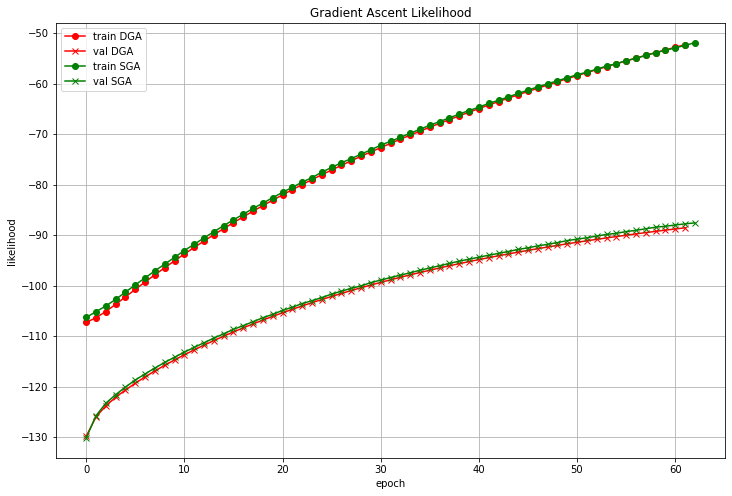

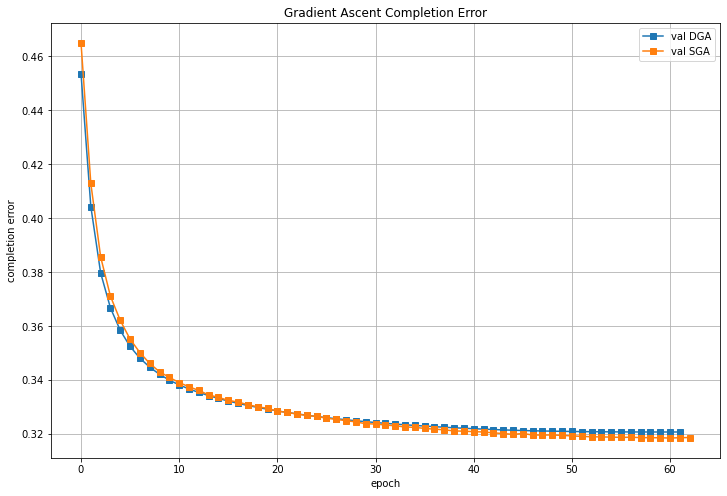

In [15]:
plt.title("Gradient Ascent Likelihood")
plt.xlabel("epoch")
plt.ylabel("likelihood")
plt.plot(res_DGA["history"]["train_likelihood"],'o-', label='train DGA', color='red')
plt.plot(res_DGA["history"]["val_likelihood"],'x-', label='val DGA', color='red')
plt.plot(res_SGA["history"]["train_likelihood"],'o-', label='train SGA', color='green')
plt.plot(res_SGA["history"]["val_likelihood"],'x-', label='val SGA', color='green')
#plt.plot(steps,len(steps)*[N*likelihood_random],'-',label='random model')
#plt.xlim([1,300])
#plt.ylim([-100,-50])
plt.grid()
plt.legend()
plt.show()
# plt.savefig("SGA_DGA_comparison_1sub_iiccCshr.pdf")
    
plt.title("Gradient Ascent Completion Error")
plt.xlabel("epoch")
plt.ylabel("completion error")
plt.plot(res_DGA["history"]["val_completion_error"],'s-', label="val DGA")
plt.plot(res_SGA["history"]["val_completion_error"],'s-', label="val SGA")
plt.grid()
plt.legend()
plt.show()



In [ ]:
# I would like to write a function that recieves 
1. a dictionary with the methods (and with the quantities to be cross-validated)
2. a dictionary with the estimators 
    - various metrics of C_reg|C_true
    - test likelihood 
    - completion error
3. an array of databases SxTxN where S=nb.of subjects 
and then it returns a dictionary in which the entries are the methods and the fields of each method corresponds
to:
    - the result of each estimator for each database (i.e. for each subject)
    - its error

In [ ]:
I would also like to write the function "cons-PCA" editing the function "PCA" of scikit-learn

In [ ]:
Afterwards, I would also like to perform the 'for' over the subjects

Afterwards, I would also like to perform the 'for' over the syntetic data

# Analyze PARALLEL RUN

In [1]:
import pickle
import pandas as pd
import utils

# resfile = 'all_results_tommaso.pickle'
# resfile = 'all_results_dirichelet.pickle'
# resfile = 'all_results_dirichelet_20210901.pickle'
resfile = 'all_results_dirichelet_test.pickle'

with open(resfile, 'rb') as f:
    all_results = pickle.load(f)

df = pd.DataFrame(list(utils.splat_dict(all_results)), columns=["subject", "method", "criterium", "value", "other"])
df = df[(df.criterium != "history") & (df.criterium != "Cclean")].drop("other", axis=1)
df["value"] = df["value"].astype(float)
df

/home/lucibello/miniconda3/envs/corrmat/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


,subject,method,criterium,value
0,"(199, 2.5, 144, 116)",PCA_CV,train_likelihood,-159.019629
1,"(199, 2.5, 144, 116)",PCA_CV,test_likelihood,-163.008932
2,"(199, 2.5, 144, 116)",PCA_CV,train_completion_error,-0.752733
3,"(199, 2.5, 144, 116)",PCA_CV,test_completion_error,-0.773850
5,"(199, 2.5, 144, 116)",PCA_CV,time,2.989101
...,...,...,...,...
1063,"(199, 4, 2000, 116)",GA_bootstrapping=False_stop=likelihood,test_likelihood,-161.480234
1064,"(199, 4, 2000, 116)",GA_bootstrapping=False_stop=likelihood,train_completion_error,0.684955
1065,"(199, 4, 2000, 116)",GA_bootstrapping=False_stop=likelihood,test_completion_error,0.727711
1070,"(199, 4, 2000, 116)",GA_bootstrapping=False_stop=likelihood,time,54.722734


In [2]:
#df.groupby(["method", "criterium"])["value"].mean().unstack()

In [3]:
#df.groupby(["method", "criterium"])["value"].std().unstack()

In [20]:
import pickle
import pandas as pd
import numpy as np
from numpy.linalg import inv
import utils

resfile = 'all_results_dirichelet.pickle'
# resfile = 'all_results_dirichelet_20210901.pickle'
# resfile = 'test_fixedTtest_dirichelet.pickle'
with open(resfile, 'rb') as f:
    all_results = pickle.load(f)


In [21]:
[k for k in all_results.keys()] 

[(10, 2.5, 144, 116),
 (1, 2.5, 144, 116),
 (12, 2.5, 144, 116),
 (13, 2.5, 144, 116),
 (5, 2.5, 144, 116),
 (14, 2.5, 144, 116),
 (15, 2.5, 144, 116),
 (16, 2.5, 144, 116),
 (17, 2.5, 144, 116),
 (18, 2.5, 144, 116),
 (19, 2.5, 144, 116),
 (7, 2.5, 144, 116),
 (0, 2.5, 144, 116),
 (2, 2.5, 144, 116),
 (3, 2.5, 144, 116),
 (9, 2.5, 144, 116),
 (6, 2.5, 144, 116),
 (8, 2.5, 144, 116),
 (11, 2.5, 144, 116),
 (4, 2.5, 144, 116)]

In [11]:
def compute_diffJtrue(all_results):
    for key, res in all_results.items():
        Ctrue = res["Ctrue"]
        for method, resmethod in res.items():
            if method == "Ctrue":
                continue
            Cclean = resmethod["Cclean"]
            Jtrue = inv(Ctrue)
            Jclean = inv(Cclean)
            resmethod["diffJtrue"] = np.mean((Jtrue - Jclean)**2)
            resmethod["diffJDiag"] = np.mean((np.diag(Jtrue) - np.diag(Jclean))**2)
            JtrueOff = Jtrue - np.eye(len(Jtrue))*np.diag(Jtrue)
            JcleanOff = Jclean - np.eye(len(Jclean))*np.diag(Jclean)
            resmethod["diffJOffDiag"] = np.mean((JtrueOff - JcleanOff)**2)
            # resmethod["DiagCtrue"] = np.mean(np.diag(Ctrue))
            # resmethod["DiagCclean"] = np.mean(np.diag(Cclean))
            resmethod["diffCtrue"] = np.mean((Ctrue - Cclean)**2)
            # resmethod["diffCDiag"] = np.mean((np.diag(Ctrue) - np.diag(Cclean))**2)

compute_diffJtrue(all_results)

In [13]:
all_results[1]

KeyError: 1

In [7]:
df = pd.DataFrame(list(utils.splat_dict(all_results)), columns=["subject", "method", "criterium", "value", "other"])
df = df[(df.criterium != "history") & (df.criterium != "Cclean") & (df.method != "Ctrue")].drop("other", axis=1)
df = df[(df.method != "true_params")]
df["value"] = df["value"].astype(float)
df["N"] = list(map(lambda x : x[3], df.subject))
df["Ttrain"] = list(map(lambda x : x[2], df.subject))
df["alpha"] = list(map(lambda x : x[1], df.subject))
df["subject"] = list(map(lambda x : x[0], df.subject))

# df = pd.DataFrame(list(utils.splat_dict(all_results)), columns=["subject", "method", "criterium", "value"])
# df = df[(df.criterium != "history") & (df.criterium != "Cclean") & (df.method != "Ctrue")]
# df = df[(df.method != "true_params")]
# df["value"] = df["value"].astype(float)
# df["N"] = list(map(lambda x : x[3], df.subject))
# df["Ttrain"] = list(map(lambda x : x[2], df.subject))
# df["alpha"] = list(map(lambda x : x[1], df.subject))
# df["subject"] = list(map(lambda x : x[0], df.subject))

df

/home/lucibello/miniconda3/envs/corrmat/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


,subject,method,criterium,value,N,Ttrain,alpha
0,199,PCA_CV,train_likelihood,-159.019629,116,144,2.5
1,199,PCA_CV,test_likelihood,-163.008932,116,144,2.5
2,199,PCA_CV,train_completion_error,-0.752733,116,144,2.5
3,199,PCA_CV,test_completion_error,-0.773850,116,144,2.5
5,199,PCA_CV,time,2.989101,116,144,2.5
...,...,...,...,...,...,...,...
1642,199,GA_bootstrapping=False_stop=likelihood,time,54.722734,116,2000,4.0
1643,199,GA_bootstrapping=False_stop=likelihood,diffJtrue,0.003333,116,2000,4.0
1644,199,GA_bootstrapping=False_stop=likelihood,diffJDiag,0.143120,116,2000,4.0
1645,199,GA_bootstrapping=False_stop=likelihood,diffJOffDiag,0.002099,116,2000,4.0


In [9]:
set(df.subject)

{197, 198, 199}

In [19]:
set(df.alpha), set(df.Ttrain)

({1.0}, {144, 300, 1000, 2000})

In [20]:
df[(df.alpha==1.)].groupby(["method", "criterium", "Ttrain"])["value"].mean().unstack()

Ttrain                               144         300         1000        2000
method criterium                                                             
PCA_CV diffCtrue                 0.003391    0.002779    0.000861    0.000348
       diffJDiag               425.359456  189.183592    0.507817    0.205476
       diffJOffDiag              2.258471    1.295667    0.029270    0.019375
       diffJtrue                 5.925362    2.926561    0.033648    0.021146
       test_completion_error    -0.397738   -0.419775   -0.565012   -0.503231
       test_likelihood         -94.044263  -75.871533 -114.526115 -100.684911
       time                      3.595365    4.930510   10.182125   18.183340
       train_completion_error   -0.338480   -0.367590   -0.535159   -0.489746
       train_likelihood        -74.095631  -58.913890 -107.547877  -97.224652
RIE_CV diffCtrue                 0.003322    0.002723    0.000820    0.000338
       diffJDiag               311.245926   60.035396    0.238578    0.188410
       diffJOffDiag              1.736116    0.644112    0.017243    0.015853
       diffJtrue                 4.419270    1.161658    0.019300    0.017477
       test_completion_error     0.564667    0.642891    0.523921    0.484366
       test_likelihood         -76.135317  -63.147251 -113.519192 -100.398390
       time                      0.704247    0.644873    0.699139    0.716719
       train_completion_error    0.470948    0.595084    0.495568    0.470861
       train_likelihood        -55.866020  -47.743334 -108.452323  -97.440561

In [43]:
df[(df.alpha==1.) & (df.Ttrain==2000)].groupby(["method", "criterium"])["value"].std().unstack() #/ np.sqrt(40)

criterium,test_completion_error,test_likelihood,time,train_completion_error,train_likelihood
method,,,,,
GA_bootstrapping=False_stop=completion,0.076193,17.603366,9.397999,0.052494,15.253354
GA_bootstrapping=False_stop=likelihood,0.083323,23.211607,2.130999,0.044827,15.880223
GA_bootstrapping=True_stop=completion,0.075998,15.820787,10.946130,0.051967,13.138140
GA_bootstrapping=True_stop=likelihood,0.080312,21.473486,3.734217,0.049522,15.848499
PCA_CV,0.066474,25.593003,0.202105,0.062171,27.090793
PCA_Minka,0.111508,25.662189,0.016961,0.120560,28.193437
RIE,0.060166,14.740947,0.011673,0.054562,13.182816
RIE_CV,0.076779,26.555329,0.044292,0.090123,26.958703
Shrink_CV,0.067709,13.104055,0.057721,0.043572,10.316343
